In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
from mle_toolbox.report import generate_report, MarkdownGenerator
from mle_toolbox.protocol import load_local_protocol_db

import markdown2
import pdfkit
from dotmap import DotMap

In [24]:
db, all_experiment_ids, last_experiment_id = load_local_protocol_db()
e_id = all_experiment_ids[-1]
report_data = DotMap(db.get(e_id))

'/Users/rtl/Dropbox/core-code/mle-toolbox/examples/experiments/'

In [5]:
with MarkdownGenerator(
    filename = str(e_id) + ".md", enable_write=False
) as doc:
    doc.addHeader(1, "Experiment Protocol: " + report_data["project_name"] + " - " + e_id)

    # Meta-Data of the Experiment
    doc.addHeader(2, "Experiment Meta-Data.")
    doc.writeTextLine(f'{doc.addBoldedText("Purpose:")} ' + report_data["purpose"])

    # Hyperparameters used in the Experiment
    doc.addHeader(2, "Hyperparameters.")
    table = [
        {"Parameter": "col1row1", "Value": "col2row1"},
        {"Parameter": "col1row2", "Value": "col2row2"}
    ]
    doc.addTable(dictionary_list=table)

    # Generated header for figures of the Experiment
    doc.addHeader(2, "Generated Figures.")
    doc.writeTextLine('<img src="/Users/rtl/Desktop/django_db_overview.png" width="30%" style="margin-right:20px">')


In [6]:
# Convert the .md into a renderable HTML file
text = open(e_id + ".md").read()
with open(e_id + ".html", 'w') as output_file:
    html_text = markdown2.markdown(text, extras=["tables"])
    #html_text += '<img src="/Users/rtl/Desktop/django_db_overview.png" width="30%" style="margin-right:20px">'
    #html_text += '<img src="/Users/rtl/Desktop/django_db_overview.png" width="30%" style="margin-right:20px">'
    #html_text += '<img src="/Users/rtl/Desktop/django_db_overview.png" width="30%" style="margin-right:20px">'
    output_file.write(html_text)

In [7]:
# Generate a pdf file for the report
output_filename = e_id + '.pdf'
pdfkit.from_string(html_text, output_filename,
                   options={"enable-local-file-access": None,
                            'page-size': 'A4',
                            'dpi': 400,
                            'print-media-type': '',
                            'disable-smart-shrinking': ''})

Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


True

# Test out figure generator

In [29]:
from mle_toolbox.report import FigureGenerator

In [30]:
fig_gen = FigureGenerator(report_data.exp_retrieval_path)

/Users/rtl/anaconda2/envs/ma-vision/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/rtl/anaconda2/envs/ma-vision/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


['/Users/rtl/Dropbox/core-code/mle-toolbox/examples/experiments/figures/integral',
 '/Users/rtl/Dropbox/core-code/mle-toolbox/examples/experiments/figures/noise']

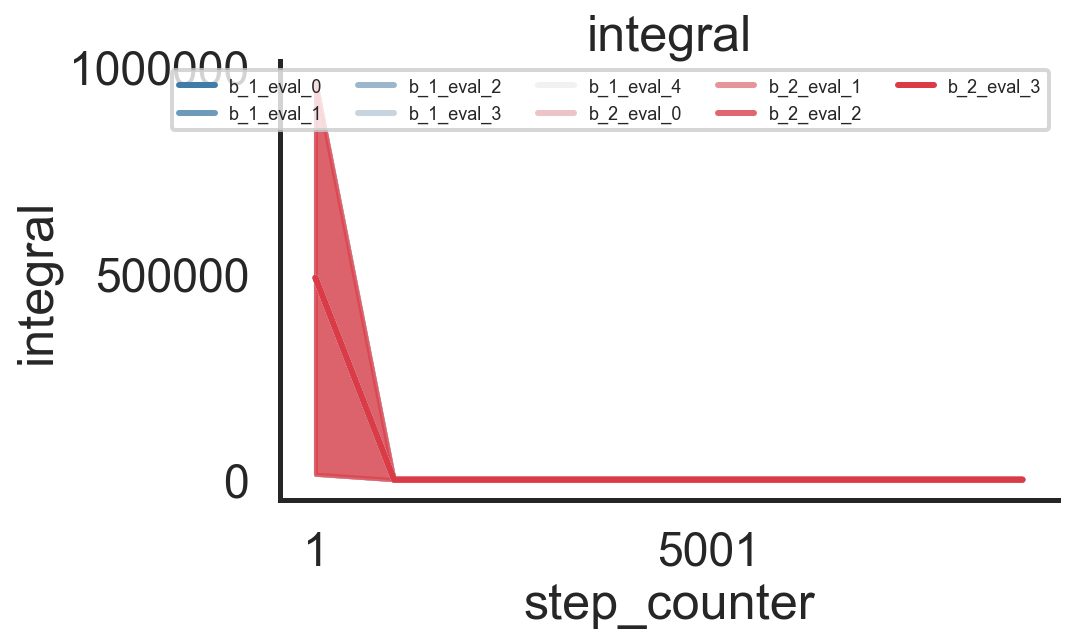

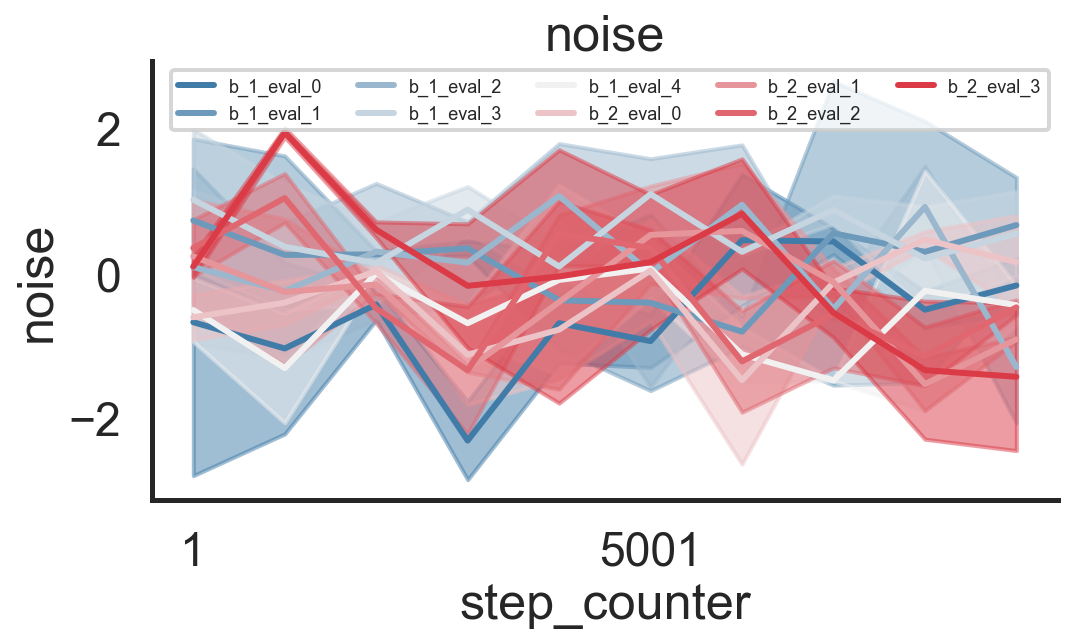

In [31]:
fig_gen.generate_all_1D_figures()